# Mineria de Texto

##### Integrantes: 
##### - Harold Aquino Curisinche 
##### - Rosa Estrada Estrada
##### Descripción: Aplicación de minería de texto a los reclamos de SUSALUD

## Importación de librerías

In [2]:
# 📌 1. Manejo de Datos
import pandas as pd
import numpy as np

In [3]:
# 📌 2. Manejo de Texto y Expresiones Regulares
import re
import string

In [4]:
%pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
# 📌 3. Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [8]:
# 📌 4. Análisis de Frecuencia de Palabras
from collections import Counter

In [10]:
# 📌 5. Procesamiento del Lenguaje Natural (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import bigrams

In [11]:
# 📌 6. Representación Vectorial de Texto
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [12]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [18]:
# 📌 7. Análisis de Sentimiento y Texto
from textblob import TextBlob

In [19]:
# 📌 8. Procesamiento Avanzado de Texto con SpaCy
import spacy

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [22]:
# Descargar recursos de NLTK
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/user/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 6.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [27]:
# Cargar modelo de NLP en español
nlp = spacy.load("es_core_news_md")

In [28]:
# Configuración de gráficos
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.2)

# Cargar datos y seleccionar campo de texto

In [30]:
# Cargar dataset procesado
df = pd.read_csv("../data/processed/reclamos_clean_transformed.csv")

In [31]:
# Seleccionar la columna de texto relevante (asumiendo que es 'DE_CLASIF_1')
df_text = df[["CO_UNICO_RECLAMO", "DE_CLASIF_1"]].dropna()
df_text.rename(columns={"DE_CLASIF_1": "texto"}, inplace=True)

In [39]:
print("Ejemplo de texto:\n", df_text["texto"].sample(5))

Ejemplo de texto:
 133718    No permitir al usuario la libre elección de IP...
116239                          Otros relativos a las IAFAS
85268                           Otros relativos a las IAFAS
28375           Negar la acreditación de usuario asegurado.
117409                                 Cobrar indebidamente
Name: texto, dtype: object


#  Preprocesamiento del texto

In [42]:
# Función para limpiar texto
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'\d+', '', texto)  # Eliminar números
    texto = texto.translate(str.maketrans('', '', string.punctuation))  # Quitar puntuación
    tokens = word_tokenize(texto)  # Tokenización
    tokens = [word for word in tokens if word not in stopwords.words("spanish")]  # Eliminar stopwords
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]  # Lematización
    return " ".join(tokens)

In [44]:
# Aplicar limpieza
df_text["texto_limpio"] = df_text["texto"].apply(limpiar_texto)

In [45]:
print("Ejemplo de texto limpio:\n", df_text["texto_limpio"].sample(5))

Ejemplo de texto limpio:
 73979                          relativos iafas
80374                                         
84395     negar demora otorgar cobertura salud
15524     negar acreditación usuario asegurado
109671                                        
Name: texto_limpio, dtype: object


#  Frecuencia de palabras

In [47]:
# Unir todo el texto limpio
texto_completo = " ".join(df_text["texto_limpio"])

In [48]:
# Contar palabras más comunes
palabras = texto_completo.split()
frecuencia = Counter(palabras).most_common(20)

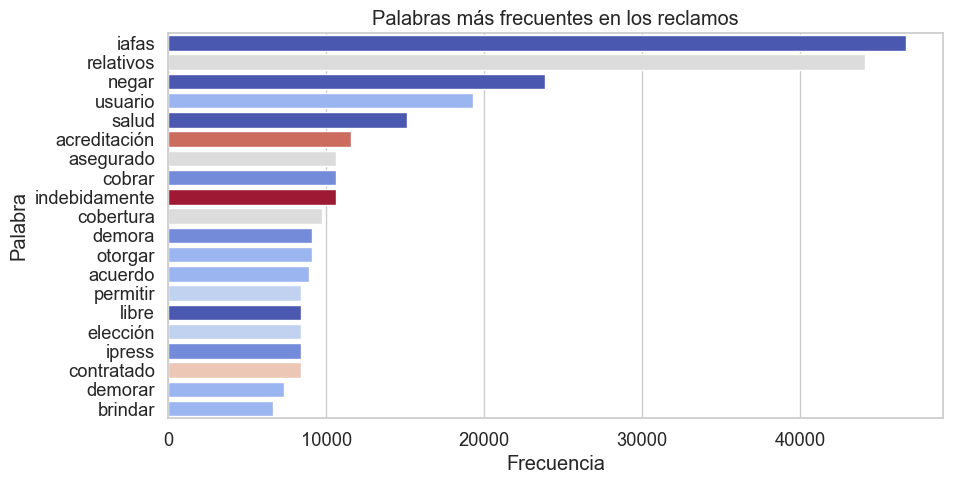

In [49]:
# Graficar las palabras más frecuentes
plt.figure(figsize=(10, 5))
sns.barplot(x=[x[1] for x in frecuencia], y=[x[0] for x in frecuencia], hue=[len(x[0]) for x in frecuencia], legend=False ,palette="coolwarm")
plt.title("Palabras más frecuentes en los reclamos")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

# Nube de palabras

In [56]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_completo)

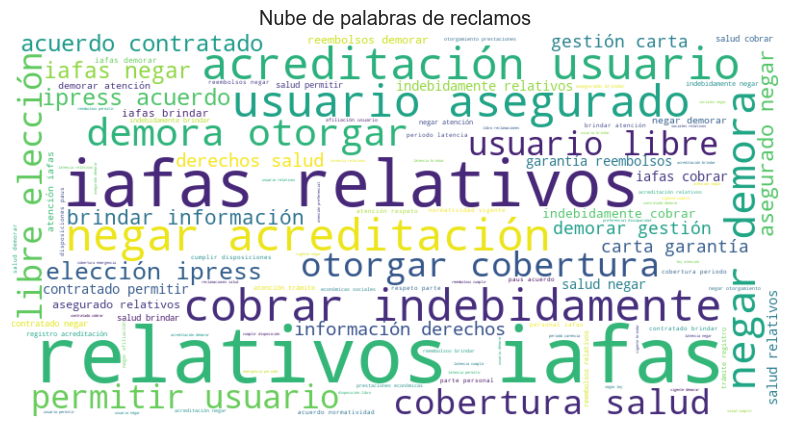

In [57]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras de reclamos")
plt.show()

# Analisis de sentimientos

In [61]:
# Función de análisis de sentimiento
def obtener_sentimiento(texto):
    analisis = TextBlob(texto)
    return analisis.sentiment.polarity

In [63]:
# Aplicar análisis de sentimiento
df_text["sentimiento"] = df_text["texto_limpio"].apply(obtener_sentimiento)

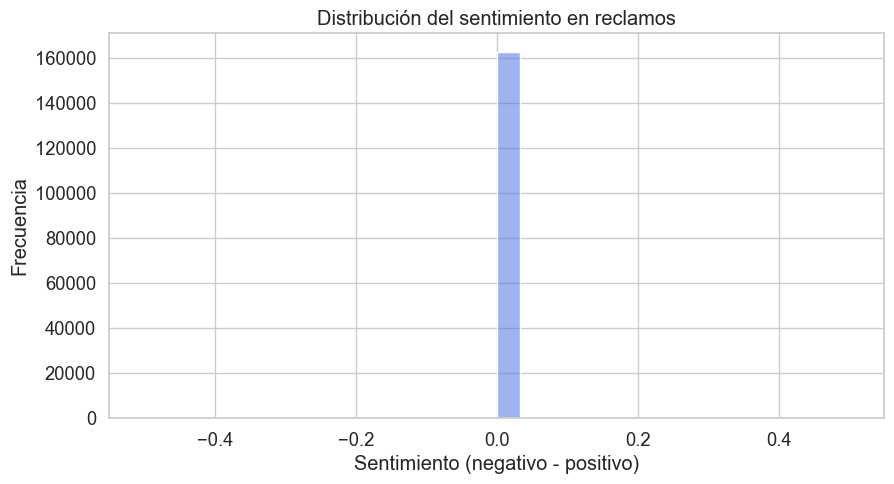

In [64]:
# Visualizar distribución
plt.figure(figsize=(10, 5))
sns.histplot(df_text["sentimiento"], bins=30, kde=True, color="royalblue")
plt.title("Distribución del sentimiento en reclamos")
plt.xlabel("Sentimiento (negativo - positivo)")
plt.ylabel("Frecuencia")
plt.show()

# Modelado de temas con LDA (Latent Dirichlet Allocation)

In [66]:
from sklearn.decomposition import LatentDirichletAllocation

In [67]:
# Obtener stopwords en español
stop_words_spanish = stopwords.words('spanish')

In [68]:
# Vectorización de texto
vectorizer = CountVectorizer(max_features=500, stop_words=stop_words_spanish)
X = vectorizer.fit_transform(df_text["texto_limpio"])

In [69]:
# Modelo LDA con 5 temas
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [70]:
# Mostrar palabras clave por tema
palabras = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Tema {i+1}: ", [palabras[i] for i in topic.argsort()[-10:]])

Tema 1:  ['demorar', 'atención', 'derechos', 'información', 'brindar', 'otorgar', 'demora', 'cobertura', 'negar', 'salud']
Tema 2:  ['relativos', 'iafas', 'atención', 'trámite', 'registro', 'afiliación', 'asegurado', 'usuario', 'negar', 'acreditación']
Tema 3:  ['latencia', 'brindar', 'negar', 'parte', 'personal', 'respeto', 'atención', 'demorar', 'relativos', 'iafas']
Tema 4:  ['disposiciones', 'paus', 'cumplir', 'garantía', 'carta', 'gestión', 'reembolsos', 'demorar', 'indebidamente', 'cobrar']
Tema 5:  ['carencia', 'latencia', 'periodo', 'usuario', 'contratado', 'ipress', 'libre', 'permitir', 'elección', 'acuerdo']


# METRICAS

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec, FastText

In [89]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec, FastText
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

In [99]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [101]:
import gensim

In [93]:
# Calcular perplejidad
perplexity = lda.perplexity(X)

In [95]:
# Calcular coherencia
# Convertir el corpus a formato de Gensim
corpus = [text.split() for text in df_text["texto_limpio"]]
dictionary = Dictionary(corpus)
corpus_gensim = [dictionary.doc2bow(text) for text in corpus]

In [103]:
# Calcular coherencia usando el modelo LDA de Gensim
lda_gensim = gensim.models.ldamodel.LdaModel(corpus=corpus_gensim, id2word=dictionary, num_topics=5, random_state=42)
coherence_model_lda = CoherenceModel(model=lda_gensim, texts=corpus, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

In [105]:
# Crear tabla de métricas
metrics = {
    "Perplejidad": perplexity,
    "Coherencia": coherence_lda,
    "Calidad del Modelo": lda.score(X)
}

In [107]:
metrics_df = pd.DataFrame(metrics, index=["LDA"])
metrics_df

,Perplejidad,Coherencia,Calidad del Modelo
LDA,11.67831,0.46977,-813423.700551


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la distribución de los temas
topic_distribution = lda.transform(X)
topic_distribution_df = pd.DataFrame(topic_distribution, columns=[f"Tema {i+1}" for i in range(5)])

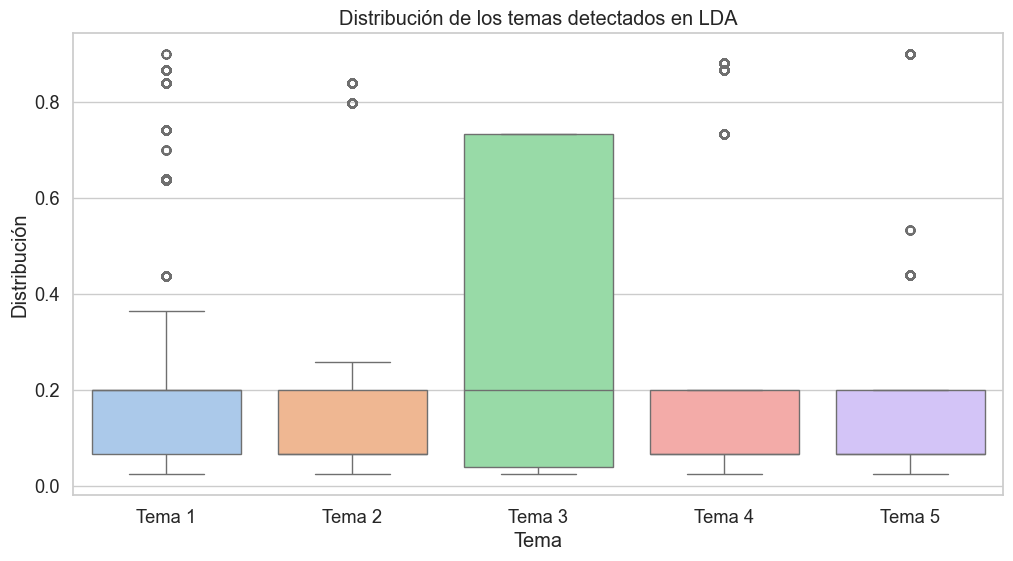

In [111]:
# Graficar la distribución de los temas
plt.figure(figsize=(12, 6))
sns.boxplot(data=topic_distribution_df)
plt.title("Distribución de los temas detectados en LDA")
plt.xlabel("Tema")
plt.ylabel("Distribución")
plt.show()

In [102]:
import pickle

In [79]:
# Vectorización con TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df_text['texto_limpio'])

In [82]:
# Entrenamiento de Word2Vec
sentences = [text.split() for text in df_text['texto_limpio']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)


In [83]:
# Entrenamiento de FastText
fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [84]:
# Función para convertir texto en vectores usando Word2Vec/FastText
def text_to_vector(model, text):
    words = text.split()
    vector = np.mean([model.wv[word] for word in words if word in model.wv] or [np.zeros(100)], axis=0)
    return vector

In [94]:
df_text['categoria'] = df['DE_CLASIF_1']

In [95]:
print("\nCategorías únicas:")
print(df_text['categoria'].value_counts())


Categorías únicas:
categoria
-                                                                                   63269
Otros relativos a las IAFAS                                                         44090
Negar la acreditación de usuario asegurado.                                         10605
Cobrar indebidamente                                                                10594
Negar  o demora en otorgar la cobertura en salud                                     9103
No permitir al usuario la libre elección de IPRESS de acuerdo a lo contratado        8409
No brindar información sobre sus derechos en salud                                   5986
Demorar la gestión de la carta de garantía y/o reembolsos.                           5274
Negar o demorar en la atención en la IAFAS                                           2028
Negar atención para el trámite de registro o acreditación                             945
No brindar atención con respeto de parte del personal de la IAFAS     

In [96]:
# Aplicar Word2Vec y FastText a los textos
df_text['word2vec_vector'] = df_text['texto_limpio'].apply(lambda x: text_to_vector(word2vec_model, x))
df_text['fasttext_vector'] = df_text['texto_limpio'].apply(lambda x: text_to_vector(fasttext_model, x))

In [97]:
# División en conjunto de entrenamiento y prueba
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df_text['categoria'], test_size=0.2, random_state=42)
X_train_w2v, X_test_w2v, _, _ = train_test_split(list(df_text['word2vec_vector']), df_text['categoria'], test_size=0.2, random_state=42)
X_train_ft, X_test_ft, _, _ = train_test_split(list(df_text['fasttext_vector']), df_text['categoria'], test_size=0.2, random_state=42)

In [109]:
from sklearn.preprocessing import LabelEncoder

# 2. Crear y ajustar el codificador de etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_text['categoria'])

# 3. Modificar la función train_and_evaluate
def train_and_evaluate(model, X_train, X_test, name):
    # Codificar las etiquetas de entrenamiento y prueba
    y_train_encoded = label_encoder.transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    
    # Entrenar y predecir
    model.fit(X_train, y_train_encoded)
    y_pred_encoded = model.predict(X_test)
    
    # Decodificar las predicciones para el reporte
    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }
    
    print(f"\nResultados para {name}:")
    print(classification_report(y_test, y_pred))
    
    # Guardar el modelo
    pickle.dump(model, open(f"../modelos/{name}.pkl", "wb"))
    # Guardar también el label_encoder
    pickle.dump(label_encoder, open(f"../modelos/{name}_encoder.pkl", "wb"))
    
    return metrics

# 4. Verificar la codificación
print("Mapeo de categorías:")
for i, categoria in enumerate(label_encoder.classes_):
    print(f"{i}: {categoria}")

Mapeo de categorías:
0: -
1: Cobrar indebidamente
2: Demorar la gestión de la carta de garantía y/o reembolsos.
3: Negar  o demora en otorgar la cobertura en salud
4: Negar atención para el trámite de registro o acreditación
5: Negar el otorgamiento de prestaciones económicas o sociales
6: Negar la acreditación de usuario asegurado.
7: Negar la afiliación del usuario
8: Negar la cobertura de emergencia en periodo de carencia
9: Negar la cobertura en periodo de latencia
10: Negar o demorar en la atención en la IAFAS
11: No brindar atención con respeto de parte del personal de la IAFAS
12: No brindar atención según la ley de atención preferencial y de discapacidad
13: No brindar información sobre sus derechos en salud
14: No cumplir con la disposición de libro de reclamaciones en salud
15: No cumplir con las disposiciones de la PAUS de acuerdo a la normatividad vigente
16: No permitir al usuario la libre elección de IPRESS de acuerdo a lo contratado
17: Otros relativos a las IAFAS


In [110]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "MLP": MLPClassifier()
}

results = {}

In [111]:
for name, model in models.items():
    results[f"{name}_tfidf"] = train_and_evaluate(model, X_train_tfidf, X_test_tfidf, f"{name.lower()}_tfidf")
    results[f"{name}_w2v"] = train_and_evaluate(model, X_train_w2v, X_test_w2v, f"{name.lower()}_w2v")
    results[f"{name}_ft"] = train_and_evaluate(model, X_train_ft, X_test_ft, f"{name.lower()}_ft")

c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Resultados para logistic regression_tfidf:


c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                                  precision    recall  f1-score   support

                                                                               -       1.00      1.00      1.00     12640
                                                            Cobrar indebidamente       1.00      1.00      1.00      2107
                      Demorar la gestión de la carta de garantía y/o reembolsos.       1.00      1.00      1.00      1030
                                Negar  o demora en otorgar la cobertura en salud       1.00      1.00      1.00      1859
                       Negar atención para el trámite de registro o acreditación       1.00      1.00      1.00       196
                     Negar el otorgamiento de prestaciones económicas o sociales       1.00      1.00      1.00        49
                                     Negar la acreditación de usuario asegurado.       1.00      1.00      1.00      2173
                       

c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Resultados para logistic regression_w2v:


c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                                  precision    recall  f1-score   support

                                                                               -       1.00      1.00      1.00     12640
                                                            Cobrar indebidamente       1.00      1.00      1.00      2107
                      Demorar la gestión de la carta de garantía y/o reembolsos.       1.00      1.00      1.00      1030
                                Negar  o demora en otorgar la cobertura en salud       1.00      1.00      1.00      1859
                       Negar atención para el trámite de registro o acreditación       1.00      1.00      1.00       196
                     Negar el otorgamiento de prestaciones económicas o sociales       1.00      1.00      1.00        49
                                     Negar la acreditación de usuario asegurado.       1.00      1.00      1.00      2173
                       

c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Resultados para logistic regression_ft:


c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                                  precision    recall  f1-score   support

                                                                               -       1.00      1.00      1.00     12640
                                                            Cobrar indebidamente       1.00      1.00      1.00      2107
                      Demorar la gestión de la carta de garantía y/o reembolsos.       1.00      1.00      1.00      1030
                                Negar  o demora en otorgar la cobertura en salud       1.00      1.00      1.00      1859
                       Negar atención para el trámite de registro o acreditación       1.00      1.00      1.00       196
                     Negar el otorgamiento de prestaciones económicas o sociales       1.00      1.00      1.00        49
                                     Negar la acreditación de usuario asegurado.       1.00      1.00      1.00      2173
                       

In [112]:
# Guardar modelos y transformaciones
pickle.dump(tfidf_vectorizer, open("../modelos/tfidf_vectorizer.pkl", "wb"))
pickle.dump(word2vec_model, open("../modelos/word2vec_model.pkl", "wb"))
pickle.dump(fasttext_model, open("../modelos/fasttext_model.pkl", "wb"))

In [117]:
# Crear DataFrame de resultados y visualizar
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression_tfidf,0.999846,0.999693,0.999846,0.999769
Logistic Regression_w2v,0.999539,0.999107,0.999539,0.999316
Logistic Regression_ft,0.999693,0.999412,0.999693,0.999546
Random Forest_tfidf,1.000000,1.000000,1.000000,1.000000
Random Forest_w2v,1.000000,1.000000,1.000000,1.000000
Random Forest_ft,1.000000,1.000000,1.000000,1.000000
XGBoost_tfidf,1.000000,1.000000,1.000000,1.000000
XGBoost_w2v,1.000000,1.000000,1.000000,1.000000
XGBoost_ft,1.000000,1.000000,1.000000,1.000000
MLP_tfidf,1.000000,1.000000,1.000000,1.000000


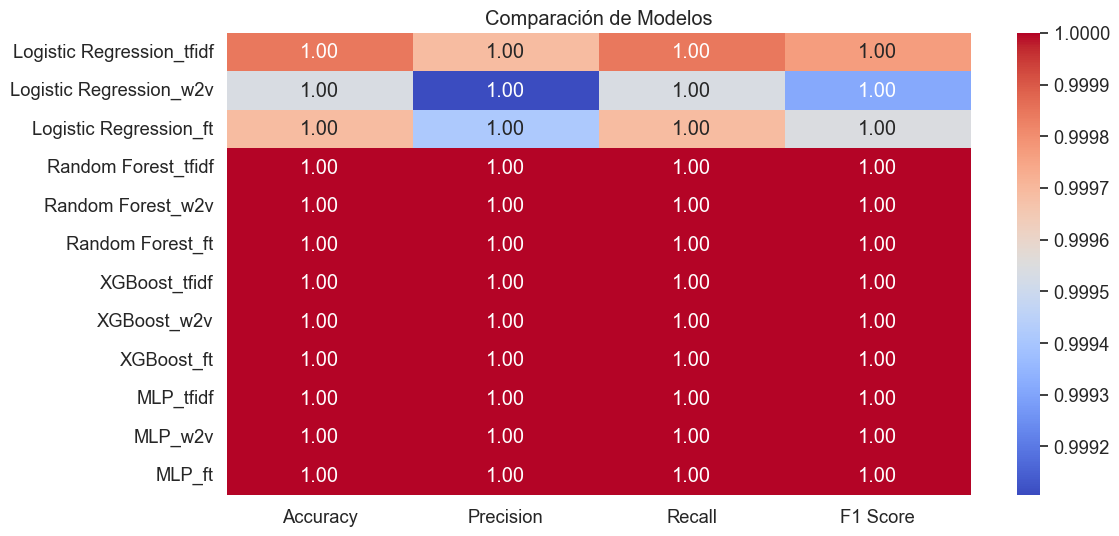

In [114]:
# Visualización de resultados
plt.figure(figsize=(12, 6))
sns.heatmap(results_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Comparación de Modelos")
plt.show()

Valores exactos en el DataFrame:
                           Accuracy  Precision  Recall  F1 Score
Logistic Regression_tfidf    0.9998     0.9997  0.9998    0.9998
Logistic Regression_w2v      0.9995     0.9991  0.9995    0.9993
Logistic Regression_ft       0.9997     0.9994  0.9997    0.9995
Random Forest_tfidf          1.0000     1.0000  1.0000    1.0000
Random Forest_w2v            1.0000     1.0000  1.0000    1.0000
Random Forest_ft             1.0000     1.0000  1.0000    1.0000
XGBoost_tfidf                1.0000     1.0000  1.0000    1.0000
XGBoost_w2v                  1.0000     1.0000  1.0000    1.0000
XGBoost_ft                   1.0000     1.0000  1.0000    1.0000
MLP_tfidf                    1.0000     1.0000  1.0000    1.0000
MLP_w2v                      1.0000     1.0000  1.0000    1.0000
MLP_ft                       1.0000     1.0000  1.0000    1.0000


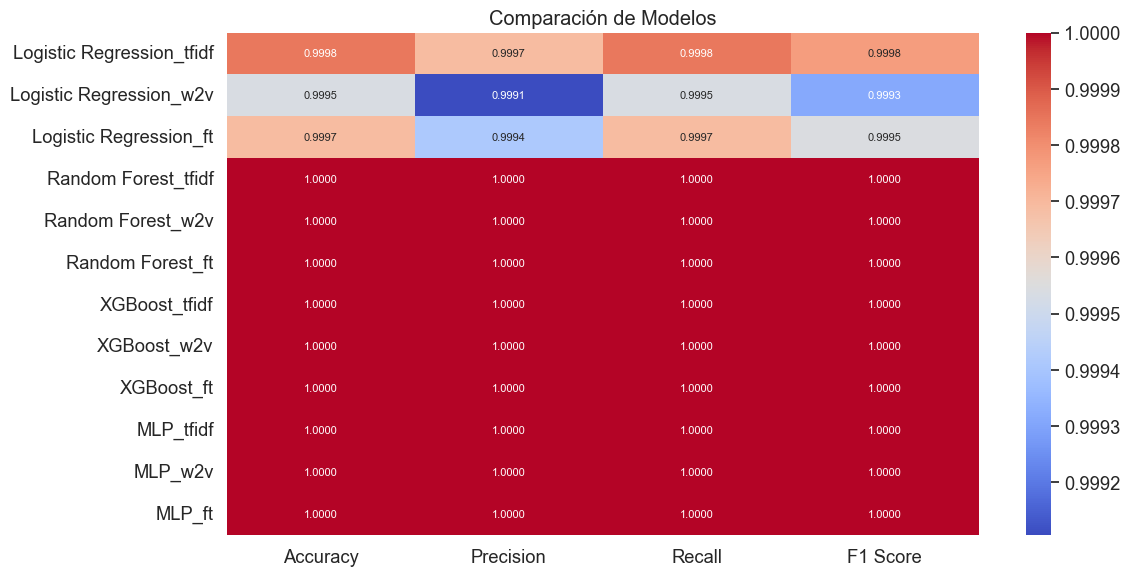

In [120]:
# Configurar el formato de visualización de pandas
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Crear DataFrame de resultados y visualizar con más precisión
results_df = pd.DataFrame.from_dict(results, orient='index')

# Verificar los valores exactos
print("Valores exactos en el DataFrame:")
print(results_df)

# Crear visualización con valores precisos
plt.figure(figsize=(12, 6))
sns.heatmap(results_df, 
            annot=True, 
            cmap="coolwarm", 
            fmt=".4f",  # Mostrar 4 decimales
            annot_kws={'size': 8})  # Ajustar tamaño del texto
plt.title("Comparación de Modelos")
plt.tight_layout()
plt.show()

In [115]:
print("Entrenamiento completado y modelos guardados.")

Entrenamiento completado y modelos guardados.
